In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Link zu dem Datensatz [hier](https://www.kaggle.com/code/abdallahwagih/twitter-sentiment-analysis?select=twitter_training.csv) .

In [2]:
columns = ['ids', 'entity', 'target', 'text']
df = pd.read_csv('twitter.csv', encoding='latin-1', names=columns)
df

,ids,entity,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


Information über den Datasatz bekommen

In [3]:
df.info

<bound method DataFrame.info of         ids       entity    target  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window

Prüfen wir, ob es fehlende Daten gibt

In [4]:
df.isnull().sum()

ids         0
entity      0
target      0
text      686
dtype: int64

Wir beschränken unsere Arbeit nur auf 2 Spalten: Target und Text

In [5]:
df = df[['target', 'text']]
df

,target,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


Wir prüfen, welche  Werte in der Spalte Target vorkommen

In [6]:
df.target.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [7]:
print("Nombre de tweets neutres :", (df['target'] == 'Neutral').sum())

Nombre de tweets neutres : 18318


Durch die Analyse des Datensatz haben wir festgelegt, dass target 1 zu den positiven Tweet, Target -1 zu negativen Tweet, Target 0 zu neutralen und Irrelevanten Tweet gehört. 

In [8]:
df.loc[df['target'] == 'Positive', 'target'] = 1
df.loc[df['target'] == 'Negative', 'target'] = -1
df.loc[df['target'] == 'Neutral', 'target'] = 0
df.loc[df['target'] == 'Irrelevant', 'target'] = 0
df.target.unique()

C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_3148\4045164756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['target'] == 'Positive', 'target'] = 1
C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_3148\4045164756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['target'] == 'Negative', 'target'] = -1
C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_3148\4045164756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

array([1, 0, -1], dtype=object)

Typ von df['target'] in int umwandeln

In [9]:
df['target'] = df['target'].astype(int)

C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_3148\3277592329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].astype(int)


Wir gucken, welche Anteil von Tweet neutral, positiv bzw. negativ ist.
Und wir stellen es durch einen Balkendiagramm dar

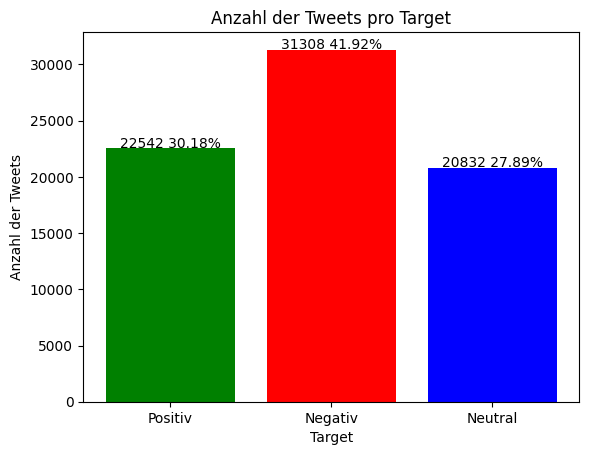

In [10]:
target_counts = df['target'].value_counts()

target_proportions = df['target'].value_counts(normalize=True)

plt.bar(target_counts.index, target_counts.values, color=['red', 'green', 'blue'])

for idx in target_counts.index:
    count = target_counts[idx]
    proportion = target_proportions[idx]
    plt.text(idx, count + 50, f'{count} {proportion:.2%}', ha='center')
    
plt.xlabel('Target')
plt.ylabel('Anzahl der Tweets')
plt.title('Anzahl der Tweets pro Target')

plt.xticks(target_counts.index, ['Negativ', 'Positiv', 'Neutral'])

plt.show()


Wir wollen  uns jetzt nur auf 10.000 postive , 10.000 neutrale  und 10.000 negative Tweets beschränken

In [11]:
positiv_tweet = df[df['target'] ==1].sample(n=10000, random_state=42)
negativ_tweet = df[df['target'] ==-1].sample(n=10000, random_state=42)
neutral_tweet = df[df['target'] ==0].sample(n=10000, random_state=42)

df= pd.concat([positiv_tweet, negativ_tweet, neutral_tweet])

df = df.reset_index(drop=True)
df

,target,text
0,1,Aye Iâm gonna keep it here slow war is the m...
1,1,"The great result of ""Bloody War"" is that the d..."
2,1,Derwin James is the best safety on this list.
3,1,"Loonngg long overdue, but good job!"
4,1,i am so excited to come home and play Call of ...
...,...,...
29995,0,Woooooo! @ juice _ ez just hit gold rank in. S...
29996,0,WOW I JUST GOT BANNED FROM A SINGLE POPPING BA...
29997,0,Thank you @ LyveRaffle for the raffle! Don't m...
29998,0,@ DaltonRoss @ robcesternino Rewatching All St...


Zeilen entfernen, bei denen 'text' NaN ist

In [12]:
df = df.dropna(subset=['text'])

Funktion zum Generieren von WordCloud

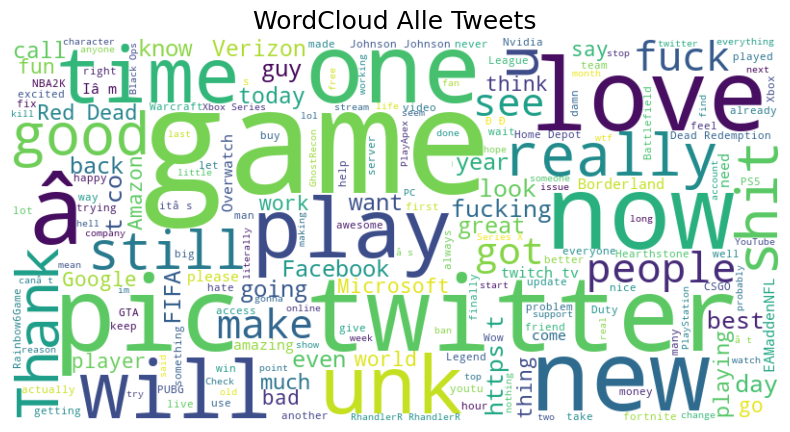

In [13]:
def generate_wordcloud(title, text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()
    
    
# WordCloud für alle Tweets
generate_wordcloud("WordCloud Alle Tweets", " ".join(df['text']))

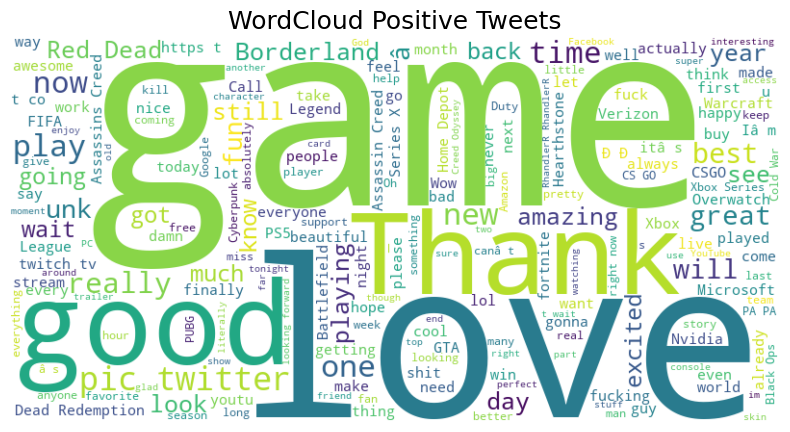

In [14]:
# WordCloud für positive Tweets
generate_wordcloud("WordCloud Positive Tweets", " ".join(df[df['target'] == 1]['text']))

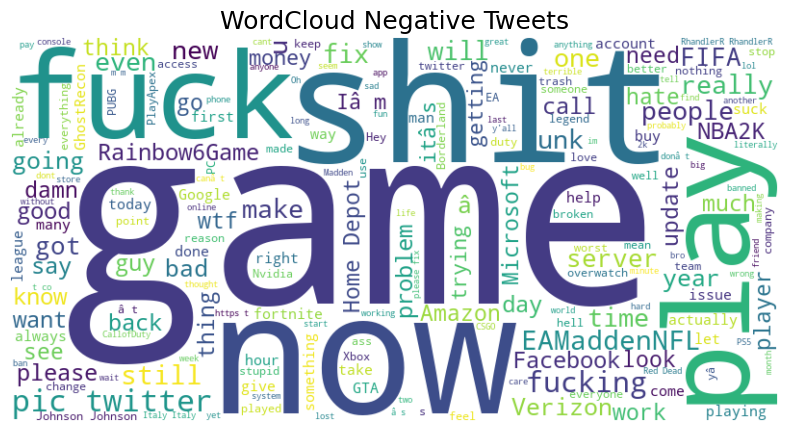

In [15]:
# WordCloud für negative Tweets
generate_wordcloud("WordCloud Negative Tweets", " ".join(df[df['target'] == -1]['text']))

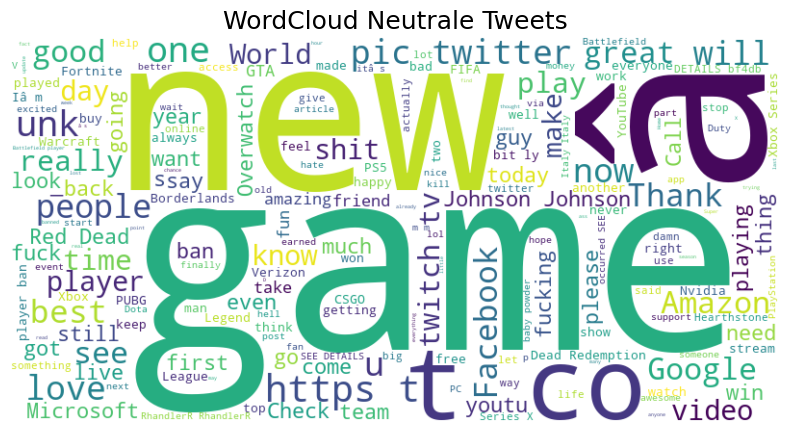

In [16]:
# WordCloud für neutrale Tweets
generate_wordcloud("WordCloud Neutrale Tweets", " ".join(df[df['target'] == 0]['text']))

Bereinigung von Daten

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK-Resourcen laden
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


# Lemmatizer-Objekt erstellen
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    #  Alles in Kleinbuchstaben
    text = text.lower()

    #  Sonderzeichen und Zahlen entfernen
    text = re.sub(r'[^a-z\s]', '', text)

    #  Tokenisierung
    words = nltk.word_tokenize(text)

    #  Stopwords entfernen (Englisch)
    words = [word for word in words if word not in stopwords.words('english')]

    #  Lemmatisierung
    words = [lemmatizer.lemmatize(word) for word in words]

    #  Zurück in einen String
    cleaned_text = " ".join(words)

    return cleaned_text

df['text_clean'] = df['text'].apply(clean_text)


[nltk_data] Downloading package wordnet to C:\Users\Lenovo
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Lenovo
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_3148\2460734299.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = df['text'].apply(clean_text)


In [19]:
df

,target,text,text_clean
0,1,Aye Iâm gonna keep it here slow war is the m...,aye im gon na keep slow war fun ive cod title ...
1,1,"The great result of ""Bloody War"" is that the d...",great result bloody war depth warcrafts plot e...
2,1,Derwin James is the best safety on this list.,derwin james best safety list
3,1,"Loonngg long overdue, but good job!",loonngg long overdue good job
4,1,i am so excited to come home and play Call of ...,excited come home play call duty im fucking lo...
...,...,...,...
29995,0,Woooooo! @ juice _ ez just hit gold rank in. S...,woooooo juice ez hit gold rank stop check some...
29996,0,WOW I JUST GOT BANNED FROM A SINGLE POPPING BA...,wow got banned single popping battlefield serv...
29997,0,Thank you @ LyveRaffle for the raffle! Don't m...,thank lyveraffle raffle dont miss guy easy sig...
29998,0,@ DaltonRoss @ robcesternino Rewatching All St...,daltonross robcesternino rewatching star deman...


Wordcloud auf den bereinigten Datensatz

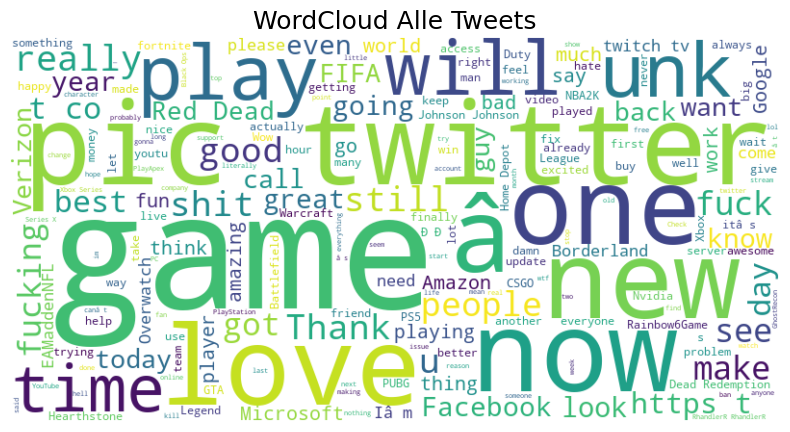

In [20]:
# WordCloud für alle Tweets
generate_wordcloud("WordCloud Alle Tweets", " ".join(df['text']))


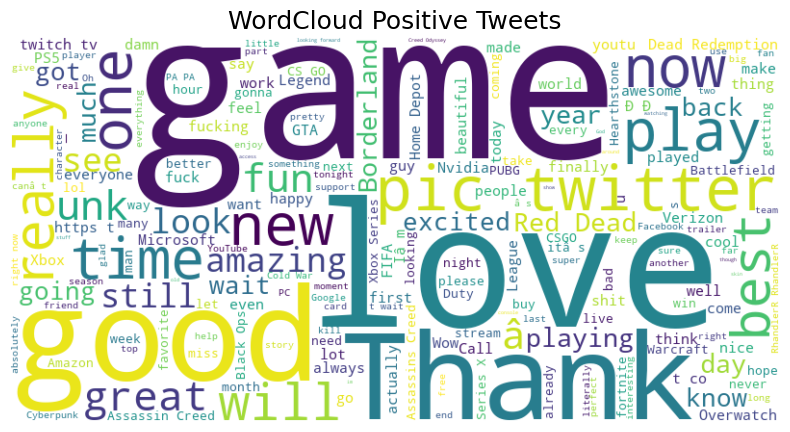

In [21]:
# WordCloud für positive Tweets
generate_wordcloud("WordCloud Positive Tweets", " ".join(df[df['target'] == 1]['text']))

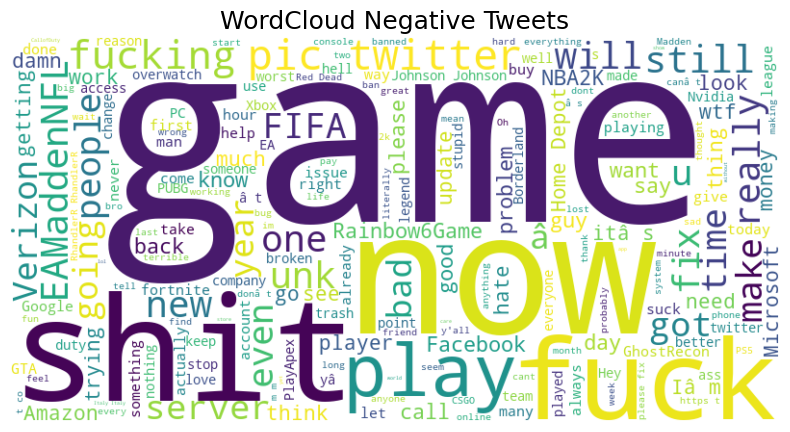

In [22]:
# WordCloud für negative Tweets
generate_wordcloud("WordCloud Negative Tweets", " ".join(df[df['target'] == -1]['text']))

Pipeline TF-IDF (Term Frequency-Inverse Document Frequency) + LinearSVC ( Support Vector Machines )

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print(df['target'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['target'], test_size=0.2, random_state=42, stratify=df['target'])

# Pipeline TF-IDF + LinearSVC
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),
        max_df=0.95,
        min_df=2,
        token_pattern=r'(?u)\b[a-z]+\b'
    )),
    ('clf', LinearSVC(class_weight='balanced', random_state=42))
])

#Training
pipe.fit(X_train, y_train)

# Evaluation
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))




target
-1    9927
 1    9906
 0    9893
Name: count, dtype: int64
              precision    recall  f1-score   support

          -1       0.84      0.85      0.85      1986
           0       0.78      0.78      0.78      1979
           1       0.85      0.83      0.84      1981

    accuracy                           0.82      5946
   macro avg       0.82      0.82      0.82      5946
weighted avg       0.82      0.82      0.82      5946



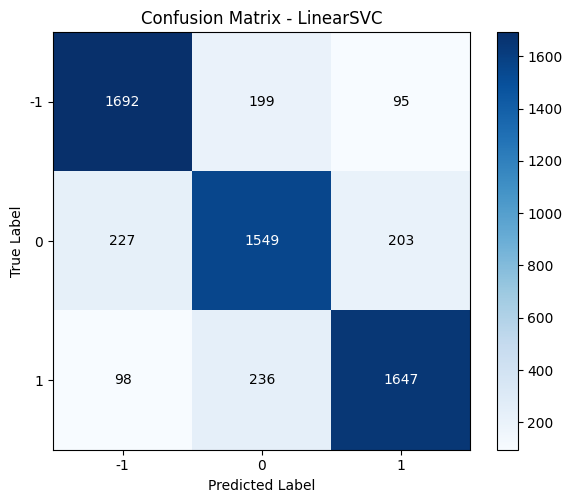

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion-Matrix berechnen
labels = np.sort(np.unique(np.concatenate([y_test, y_pred])))
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Farbskala
plt.colorbar(im, ax=ax)  # Farbskala daneben

# Achsenbeschriftung
ax.set_title('Confusion Matrix - LinearSVC')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Zahlen in jede Zelle schreiben
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]:d}",
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [25]:
import torch
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import Dataset
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


BERT: Training + Test + Konfusionsmatrix

# BERT-Tokenizer laden

In [26]:
# Sicherstellen, dass die Daten korrekt vorbereitet sind
print("Eindeutige Werte in y_train:", np.unique(y_train))
print("Eindeutige Werte in y_test:", np.unique(y_test))

# Labels umkodieren, damit sie bei 0 beginnen (-1 -> 0, 0 -> 1, 1 -> 2)
y_train_encoded = np.where(y_train == -1, 0, np.where(y_train == 0, 1, 2))
y_test_encoded = np.where(y_test == -1, 0, np.where(y_test == 0, 1, 2))

print("Eindeutige Werte in y_train_encoded:", np.unique(y_train_encoded))
print("Eindeutige Werte in y_test_encoded:", np.unique(y_test_encoded))

# BERT-Tokenizer laden
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Eindeutige Werte in y_train: [-1  0  1]
Eindeutige Werte in y_test: [-1  0  1]
Eindeutige Werte in y_train_encoded: [0 1 2]
Eindeutige Werte in y_test_encoded: [0 1 2]


# Custom Dataset-Klasse für BERT

In [27]:
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        # Tokenisierung für jedes Element einzeln
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

    def __len__(self):
        return len(self.labels)


# Datensätze erstellen


In [28]:
# Datensätze mit umkodierten Labels erstellen
train_dataset = TweetDataset(X_train, y_train_encoded, tokenizer)
test_dataset = TweetDataset(X_test, y_test_encoded, tokenizer)

# Überprüfen der ersten Elemente im Dataset
print("Erstes Element im Train-Dataset:")
first_item = train_dataset[0]
print("Input IDs Shape:", first_item['input_ids'].shape)
print("Attention Mask Shape:", first_item['attention_mask'].shape)
print("Label:", first_item['labels'].item())

Erstes Element im Train-Dataset:
Input IDs Shape: torch.Size([128])
Attention Mask Shape: torch.Size([128])
Label: 0


# Modell initialisieren

In [34]:
# ========== Imports ==========
from transformers import (
    AutoTokenizer,
    BertForSequenceClassification,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# ========== Modell + Tokenizer ==========
MODEL_NAME = "bert-base-uncased"   # oder "distilbert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3,                # drei Klassen
    output_attentions=False,
    output_hidden_states=False
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:

# ========== Data Collator (dynamisches Padding, Länge max 64) ==========
MAX_LEN = 64

def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        max_length=MAX_LEN
    )


#  Metrik berechnen und Training Arguments

In [36]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# ========== Metriken ==========
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# ========== Training Arguments ==========
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,                  # 1 Epoche
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,                  # LR = 2e-5
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)

# Trainer initialisieren und Training durchführen


In [37]:
# Trainer initialisieren
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,       # oder val_dataset
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Training durchführen
trainer.train()

C:\Users\Lenovo PC\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,1.066900
200,0.956200
300,0.912900
400,0.877400
500,0.828600
600,0.855500
700,0.786100
800,0.801200
900,0.779500
1000,0.770200


TrainOutput(global_step=1487, training_loss=0.8255270449363231, metrics={'train_runtime': 14107.6128, 'train_samples_per_second': 1.686, 'train_steps_per_second': 0.105, 'total_flos': 1564209268392960.0, 'train_loss': 0.8255270449363231, 'epoch': 1.0})

# Evaluation

In [43]:
# Evaluation
eval_results = trainer.evaluate()
print(f"BERT Evaluation Results: {eval_results}")

# Vorhersagen auf Testdaten
predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1).numpy()

# Vorhersagen zurück in das ursprüngliche Label-Format umwandeln
predicted_labels_original = np.where(predicted_labels == 0, -1, 
                                    np.where(predicted_labels == 1, 0, 1))




C:\Users\Lenovo PC\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


BERT Evaluation Results: {'eval_loss': 0.7009516358375549, 'eval_accuracy': 0.7063572149344097, 'eval_f1': 0.7048391463229752, 'eval_precision': 0.704927080849671, 'eval_recall': 0.7063572149344097, 'eval_runtime': 859.749, 'eval_samples_per_second': 6.916, 'eval_steps_per_second': 0.216, 'epoch': 1.0}


C:\Users\Lenovo PC\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


KeyboardInterrupt: 

In [45]:
# Classification Report für BERT
from sklearn.metrics import classification_report


# Classification Report für BERT
print("=" * 60)
print("CLASSIFICATION REPORT FÜR BERT")
print("=" * 60)
print(classification_report(y_test, predicted_labels_original, 
                           target_names=['Negative', 'Neutral', 'Positive']))

CLASSIFICATION REPORT FÜR BERT
              precision    recall  f1-score   support

    Negative       0.73      0.77      0.75      1986
     Neutral       0.68      0.61      0.64      1979
    Positive       0.71      0.74      0.72      1981

    accuracy                           0.71      5946
   macro avg       0.70      0.71      0.70      5946
weighted avg       0.70      0.71      0.70      5946



# Confusion Matrix für BERT


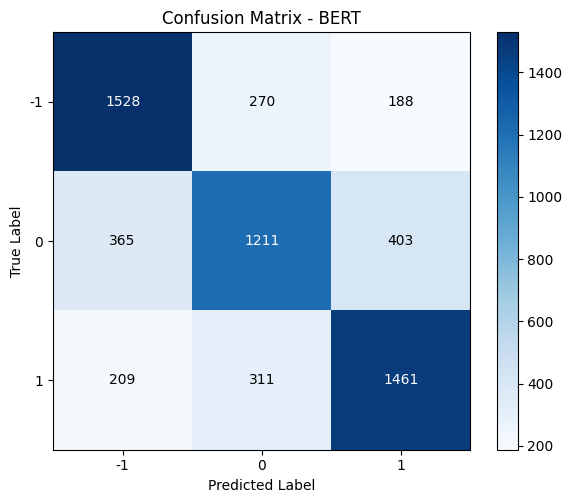

In [39]:
# Confusion Matrix für BERT
cm_bert = confusion_matrix(y_test, predicted_labels_original)


# Confusion Matrix plotten
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm_bert, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix - BERT')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['-1', '0', '1'])
ax.set_yticklabels(['-1', '0', '1'])

thresh = cm_bert.max() / 2.
for i in range(cm_bert.shape[0]):
    for j in range(cm_bert.shape[1]):
        ax.text(j, i, format(cm_bert[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_bert[i, j] > thresh else "black")

plt.tight_layout()
plt.show()